# Table of Contents

#### 01 Importing Libraries and Data

#### 02 Project Data Wrangling

#### 03 Data Merging
A. Merging the UCR with the State Geo Data
<br>
B. Merging the SHR with the State Geo Data

#### 04 Data Cleaning
A. Missing Values
<br>
B. Duplicates
<br>
C. Export the Geo Data Frames

#### 05 Visualizations

#### 06 Results

# 01 Importing Libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import geoplot

In [2]:
# allow matplotlib visuals to be displayed
%matplotlib inline

In [3]:
path = r'/Users/Dena/Murder Data Analysis'

In [4]:
# import the clean UCR data
df_ucr = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ucr_clean.csv'))

In [5]:
# check the shape
df_ucr.shape

(166225, 11)

In [6]:
# check the output
df_ucr.head()

,Unnamed: 0,ORI,name,year,murders,cleared,state,county,agency,cold_cases,region
0,0,AK00101,ANCHORAGE,1965,7,6,Alaska,"Anchorage, AK",Anchorage,1,West
1,1,AK00101,ANCHORAGE,1966,18,16,Alaska,"Anchorage, AK",Anchorage,2,West
2,2,AK00101,ANCHORAGE,1967,1,1,Alaska,"Anchorage, AK",Anchorage,0,West
3,3,AK00101,ANCHORAGE,1968,7,5,Alaska,"Anchorage, AK",Anchorage,2,West
4,4,AK00101,ANCHORAGE,1969,7,4,Alaska,"Anchorage, AK",Anchorage,3,West


In [7]:
# import the clean SHR data
df_shr = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'shr_clean_2.csv'))

In [8]:
# check the shape
df_shr.shape

(804735, 32)

In [9]:
# show all columns
pd.set_option('display.max_columns', None)

In [10]:
# check the output
df_shr.head()

,Unnamed: 0,ID,county,ORI,state,agency,agent_type,source,solved,year,month,incident,action_type,homicide,situation,victim_age,victim_sex,victim_race,victim_ethnicity,offender_age,offender_sex,offender_race,offender_ethnicity,weapon,relationship,circumstance,subcircumstance,additional_victims,additional_offenders,MSA,region,victim_age_category
0,0,197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,March,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,Unknown,Unknown or not reported,68,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,NaN,0,0,"Anchorage, AK",West,Middle Age
1,1,197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,April,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Female,White,Unknown or not reported,44,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,NaN,0,0,"Anchorage, AK",West,Young Adult
2,2,197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,38,Male,White,Unknown or not reported,27,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Other,NaN,0,0,"Anchorage, AK",West,Middle Age
3,3,197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,2,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,41,Male,White,Unknown or not reported,34,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,NaN,0,0,"Anchorage, AK",West,Middle Age
4,4,197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,July,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Male,American Indian or Alaskan Native,Unknown or not reported,37,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,"Anchorage, AK",West,Young Adult


In [11]:
# import the state geo data frame
df_st = gpd.read_file(os.path.join(path,'02 Data', 'Original Data', 'USA_States.shp'))

In [12]:
# check the shape
df_st.shape

(51, 4)

In [13]:
# check the output
df_st.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
2,Maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
3,North Dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
4,South Dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."


In [14]:
# check the value counts
df_st['STATE_NAME'].value_counts(dropna = 0).sort_index()

Alabama                 1
Alaska                  1
Arizona                 1
Arkansas                1
California              1
Colorado                1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 1
Hawaii                  1
Idaho                   1
Illinois                1
Indiana                 1
Iowa                    1
Kansas                  1
Kentucky                1
Louisiana               1
Maine                   1
Maryland                1
Massachusetts           1
Michigan                1
Minnesota               1
Mississippi             1
Missouri                1
Montana                 1
Nebraska                1
Nevada                  1
New Hampshire           1
New Jersey              1
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Ohio                    1
Oklahoma                1
Oregon                  1
Pennsylvania

# 02 Project Data Wrangling

In [15]:
# drop the unnamed column from the UCR
df_ucr.drop('Unnamed: 0', inplace = True, axis = 1)

In [16]:
# check the output
df_ucr.head()

,ORI,name,year,murders,cleared,state,county,agency,cold_cases,region
0,AK00101,ANCHORAGE,1965,7,6,Alaska,"Anchorage, AK",Anchorage,1,West
1,AK00101,ANCHORAGE,1966,18,16,Alaska,"Anchorage, AK",Anchorage,2,West
2,AK00101,ANCHORAGE,1967,1,1,Alaska,"Anchorage, AK",Anchorage,0,West
3,AK00101,ANCHORAGE,1968,7,5,Alaska,"Anchorage, AK",Anchorage,2,West
4,AK00101,ANCHORAGE,1969,7,4,Alaska,"Anchorage, AK",Anchorage,3,West


In [17]:
# change state column to match the geo data frame
df_ucr.rename(columns = {'state' : 'STATE_NAME'}, inplace = True)

In [18]:
# check the output
df_ucr.head()

,ORI,name,year,murders,cleared,STATE_NAME,county,agency,cold_cases,region
0,AK00101,ANCHORAGE,1965,7,6,Alaska,"Anchorage, AK",Anchorage,1,West
1,AK00101,ANCHORAGE,1966,18,16,Alaska,"Anchorage, AK",Anchorage,2,West
2,AK00101,ANCHORAGE,1967,1,1,Alaska,"Anchorage, AK",Anchorage,0,West
3,AK00101,ANCHORAGE,1968,7,5,Alaska,"Anchorage, AK",Anchorage,2,West
4,AK00101,ANCHORAGE,1969,7,4,Alaska,"Anchorage, AK",Anchorage,3,West


In [19]:
# drop the unnamed column from the SHR
df_shr.drop('Unnamed: 0', inplace = True, axis = 1)

In [20]:
# check the output
df_shr.head()

,ID,county,ORI,state,agency,agent_type,source,solved,year,month,incident,action_type,homicide,situation,victim_age,victim_sex,victim_race,victim_ethnicity,offender_age,offender_sex,offender_race,offender_ethnicity,weapon,relationship,circumstance,subcircumstance,additional_victims,additional_offenders,MSA,region,victim_age_category
0,197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,March,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,Unknown,Unknown or not reported,68,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,NaN,0,0,"Anchorage, AK",West,Middle Age
1,197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,April,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Female,White,Unknown or not reported,44,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,NaN,0,0,"Anchorage, AK",West,Young Adult
2,197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,38,Male,White,Unknown or not reported,27,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Other,NaN,0,0,"Anchorage, AK",West,Middle Age
3,197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,2,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,41,Male,White,Unknown or not reported,34,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,NaN,0,0,"Anchorage, AK",West,Middle Age
4,197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,July,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Male,American Indian or Alaskan Native,Unknown or not reported,37,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,"Anchorage, AK",West,Young Adult


In [21]:
# change state column to match the geo data frame
df_shr.rename(columns = {'state' : 'STATE_NAME'}, inplace = True)

In [22]:
# check the output
df_shr.head()

,ID,county,ORI,STATE_NAME,agency,agent_type,source,solved,year,month,incident,action_type,homicide,situation,victim_age,victim_sex,victim_race,victim_ethnicity,offender_age,offender_sex,offender_race,offender_ethnicity,weapon,relationship,circumstance,subcircumstance,additional_victims,additional_offenders,MSA,region,victim_age_category
0,197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,March,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,Unknown,Unknown or not reported,68,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,NaN,0,0,"Anchorage, AK",West,Middle Age
1,197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,April,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Female,White,Unknown or not reported,44,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,NaN,0,0,"Anchorage, AK",West,Young Adult
2,197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,38,Male,White,Unknown or not reported,27,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Other,NaN,0,0,"Anchorage, AK",West,Middle Age
3,197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,2,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,41,Male,White,Unknown or not reported,34,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,NaN,0,0,"Anchorage, AK",West,Middle Age
4,197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,July,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Male,American Indian or Alaskan Native,Unknown or not reported,37,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,"Anchorage, AK",West,Young Adult


# 03 Data Merging

#### A. Merging the UCR with the State Geo Data

In [23]:
# merge the UCR data onto the geo data frame
df_ucr_st = df_st.merge(df_ucr, on = 'STATE_NAME', how = 'outer', indicator = True)

In [24]:
# check the type
type(df_ucr_st)

geopandas.geodataframe.GeoDataFrame

In [25]:
# check the shape
df_ucr_st.shape

(166225, 14)

In [26]:
# check the value counts of the merge
df_ucr_st['_merge'].value_counts()

both          166225
left_only          0
right_only         0
Name: _merge, dtype: int64

In [27]:
# check the output
df_ucr_st.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,ORI,name,year,murders,cleared,county,agency,cold_cases,region,_merge
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA00100,ADAMS,1977,1,1,"Adams, WA",Adams County,0,West,both
1,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA00100,ADAMS,1982,1,0,"Adams, WA",Adams County,1,West,both
2,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA00100,ADAMS,1985,1,1,"Adams, WA",Adams County,0,West,both
3,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA00100,ADAMS,1986,1,1,"Adams, WA",Adams County,0,West,both
4,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA00100,ADAMS,1987,3,1,"Adams, WA",Adams County,2,West,both


#### B. Merging the SHR with the State Geo Data

In [29]:
# merge the SHR data onto the geo data frame
df_shr_st = df_st.merge(df_shr, on = 'STATE_NAME', how = 'outer', indicator = True)

In [30]:
# check the type
type(df_shr_st)

geopandas.geodataframe.GeoDataFrame

In [31]:
# check the shape
df_shr_st.shape

(804735, 36)

In [32]:
# check the value counts of the merge
df_shr_st['_merge'].value_counts()

both          804735
left_only          0
right_only         0
Name: _merge, dtype: int64

In [33]:
# check the output
df_shr_st.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,ID,county,ORI,agency,agent_type,source,solved,year,month,incident,action_type,homicide,situation,victim_age,victim_sex,victim_race,victim_ethnicity,offender_age,offender_sex,offender_race,offender_ethnicity,weapon,relationship,circumstance,subcircumstance,additional_victims,additional_offenders,file_date,MSA,region,victim_age_category,_merge
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",197711001WA00100,"Adams, WA",WA00100,Adams County,Sheriff,FBI,Yes,1977,November,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,2.0,Female,White,Unknown or not reported,30.0,Male,White,Unknown or not reported,Other or type unknown,Stepdaughter,Other,NaN,0,0,30180.0,Rural Washington,West,Minor,both
1,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198208001WA00100,"Adams, WA",WA00100,Adams County,Sheriff,FBI,Yes,1982,August,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,25.0,Male,Black,Not of Hispanic origin,29.0,Male,Black,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Acquaintance,Other,NaN,0,0,121482.0,Rural Washington,West,Young Adult,both
2,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198502001WA00100,"Adams, WA",WA00100,Adams County,Sheriff,FBI,Yes,1985,February,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,60.0,Female,White,Not of Hispanic origin,60.0,Male,White,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Wife,Circumstances undetermined,NaN,0,0,73185.0,Rural Washington,West,Senior,both
3,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198608001WA00100,"Adams, WA",WA00100,Adams County,Sheriff,FBI,Yes,1986,August,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,1.0,Male,White,Hispanic origin,30.0,Male,White,Hispanic origin,"Personal weapons, includes beating",Other - known to victim,Other,NaN,0,0,112686.0,Rural Washington,West,Minor,both
4,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198707001WA00100,"Adams, WA",WA00100,Adams County,Sheriff,FBI,Yes,1987,July,1,Normal update,Murder and non-negligent manslaughter,Multiple victims/multiple offenders,35.0,Male,White,Unknown or not reported,24.0,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Narcotic drug laws,NaN,1,1,22288.0,Rural Washington,West,Young Adult,both


# 04 Data Cleaning

#### A. Missing Values

In [28]:
# check for missing values in the UCR
df_ucr_st.isnull().sum()

STATE_NAME    0
STATE_FIPS    0
STATE_ABBR    0
geometry      0
ORI           0
name          0
year          0
murders       0
cleared       0
county        0
agency        0
cold_cases    0
region        0
_merge        0
dtype: int64

In [29]:
# check for missing values in the SHR
df_shr_st.isnull().sum()

NameError: name 'df_shr_st' is not defined

These missing values are the expected missing values from the SHR.

#### B. Duplicates

In [ ]:
# check for duplicaes in the UCR
dups1 = df_ucr_st.duplicated()

In [ ]:
dups1.shape

In [ ]:
# check for duplicaes in the SHR
dups2 = df_shr_st.duplicated()

In [ ]:
dups2.shape

There are no duplicates.

#### C. Export the Geo Data Frames

In [30]:
# drop the categorical column in the UCR
df_ucr_st.drop(columns ="_merge", inplace = True) 

In [31]:
# check the output
df_ucr_st.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,ORI,name,year,murders,cleared,county,agency,cold_cases,region
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA00100,ADAMS,1977,1,1,"Adams, WA",Adams County,0,West
1,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA00100,ADAMS,1982,1,0,"Adams, WA",Adams County,1,West
2,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA00100,ADAMS,1985,1,1,"Adams, WA",Adams County,0,West
3,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA00100,ADAMS,1986,1,1,"Adams, WA",Adams County,0,West
4,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA00100,ADAMS,1987,3,1,"Adams, WA",Adams County,2,West


In [77]:
# export the UCR geo data frame
out1 = (os.path.join(path, '02 Data', 'Prepared Data', 'ucr_state.shp'))
df_ucr_st.to_file(out1)

In [32]:
# delete some more columns and export a smaller UCR geo data frame
df_ucr_st.drop(columns ="ORI", inplace = True) 
df_ucr_st.drop(columns ="name", inplace = True) 
df_ucr_st.drop(columns ="county", inplace = True) 
df_ucr_st.drop(columns ="agency", inplace = True)
df_ucr_st.drop(columns ="region", inplace = True) 

In [33]:
# check the output
df_ucr_st.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,year,murders,cleared,cold_cases
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",1977,1,1,0
1,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",1982,1,0,1
2,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",1985,1,1,0
3,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",1986,1,1,0
4,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",1987,3,1,2


In [34]:
# export this small UCR geo data frame
out3 = (os.path.join(path, '02 Data', 'Prepared Data', 'ucr_state_2.shp'))
df_ucr_st.to_file(out3)

In [42]:
# drop the categorical column in the SHR
df_shr_st.drop(columns ="_merge", inplace = True) 

In [43]:
# check the output
df_shr_st.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,ID,county,ORI,agency,agent_type,source,solved,year,month,incident,action_type,homicide,situation,victim_age,victim_sex,victim_race,victim_ethnicity,offender_age,offender_sex,offender_race,offender_ethnicity,weapon,relationship,circumstance,subcircumstance,additional_victims,additional_offenders,file_date,MSA,region,victim_age_category
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",197711001WA00100,"Adams, WA",WA00100,Adams County,Sheriff,FBI,Yes,1977,November,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,2.0,Female,White,Unknown or not reported,30.0,Male,White,Unknown or not reported,Other or type unknown,Stepdaughter,Other,NaN,0,0,30180.0,Rural Washington,West,Minor
1,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198208001WA00100,"Adams, WA",WA00100,Adams County,Sheriff,FBI,Yes,1982,August,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,25.0,Male,Black,Not of Hispanic origin,29.0,Male,Black,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Acquaintance,Other,NaN,0,0,121482.0,Rural Washington,West,Young Adult
2,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198502001WA00100,"Adams, WA",WA00100,Adams County,Sheriff,FBI,Yes,1985,February,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,60.0,Female,White,Not of Hispanic origin,60.0,Male,White,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Wife,Circumstances undetermined,NaN,0,0,73185.0,Rural Washington,West,Senior
3,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198608001WA00100,"Adams, WA",WA00100,Adams County,Sheriff,FBI,Yes,1986,August,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,1.0,Male,White,Hispanic origin,30.0,Male,White,Hispanic origin,"Personal weapons, includes beating",Other - known to victim,Other,NaN,0,0,112686.0,Rural Washington,West,Minor
4,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198707001WA00100,"Adams, WA",WA00100,Adams County,Sheriff,FBI,Yes,1987,July,1,Normal update,Murder and non-negligent manslaughter,Multiple victims/multiple offenders,35.0,Male,White,Unknown or not reported,24.0,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Narcotic drug laws,NaN,1,1,22288.0,Rural Washington,West,Young Adult


Clean up the SHR geo data frame so it can export more quickly.


In [44]:
# drop unecessary columns
df_shr_st.drop('agent_type', inplace=True, axis =1)

In [45]:
df_shr_st.drop('action_type', inplace=True, axis =1)

In [46]:
df_shr_st.drop('file_date', inplace=True, axis =1)

In [47]:
df_shr_st.drop('subcircumstance', inplace=True, axis =1)

In [48]:
df_shr_st.drop('source', inplace=True, axis =1)

In [49]:
df_shr_st.drop('MSA', inplace=True, axis =1)

In [50]:
df_shr_st.drop('agency', inplace=True, axis =1)

In [51]:
df_shr_st.drop('circumstance', inplace=True, axis =1)

In [52]:
df_shr_st.drop('solved', inplace=True, axis =1)

In [53]:
df_shr_st.drop('incident', inplace=True, axis =1)

In [54]:
df_shr_st.drop('homicide', inplace=True, axis =1)

In [55]:
df_shr_st.drop('situation', inplace=True, axis =1)

In [56]:
df_shr_st.drop('victim_ethnicity', inplace=True, axis =1)

In [57]:
df_shr_st.drop('victim_race', inplace=True, axis =1)

In [58]:
df_shr_st.drop('offender_race', inplace=True, axis =1)

In [59]:
df_shr_st.drop('offender_ethnicity', inplace=True, axis =1)

In [60]:
df_shr_st.drop('weapon', inplace=True, axis =1)

In [61]:
df_shr_st.drop('relationship', inplace=True, axis =1)

In [62]:
df_shr_st.drop('region', inplace=True, axis =1)

In [63]:
df_shr_st.drop('victim_age_category', inplace=True, axis =1)

In [64]:
df_shr_st.drop('offender_sex', inplace=True, axis =1)

In [65]:
df_shr_st.drop('victim_sex', inplace=True, axis =1)

In [66]:
# check the output 
df_shr_st.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,ID,county,ORI,year,month,victim_age,offender_age,additional_victims,additional_offenders
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",197711001WA00100,"Adams, WA",WA00100,1977,November,2.0,30.0,0,0
1,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198208001WA00100,"Adams, WA",WA00100,1982,August,25.0,29.0,0,0
2,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198502001WA00100,"Adams, WA",WA00100,1985,February,60.0,60.0,0,0
3,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198608001WA00100,"Adams, WA",WA00100,1986,August,1.0,30.0,0,0
4,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198707001WA00100,"Adams, WA",WA00100,1987,July,35.0,24.0,1,1


In [67]:
# shorten column names
df_shr_st.rename(columns = {'victim_age' : 'vic_age'}, inplace = True)

In [68]:
df_shr_st.rename(columns = {'offender_age' : 'off_age'}, inplace = True)

In [69]:
df_shr_st.rename(columns = {'additional_victims' : 'add_vic'}, inplace = True)

In [70]:
df_shr_st.rename(columns = {'additional_offenders' : 'add_off'}, inplace = True)

In [71]:
# check the output
df_shr_st.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,ID,county,ORI,year,month,vic_age,off_age,add_vic,add_off
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",197711001WA00100,"Adams, WA",WA00100,1977,November,2.0,30.0,0,0
1,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198208001WA00100,"Adams, WA",WA00100,1982,August,25.0,29.0,0,0
2,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198502001WA00100,"Adams, WA",WA00100,1985,February,60.0,60.0,0,0
3,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198608001WA00100,"Adams, WA",WA00100,1986,August,1.0,30.0,0,0
4,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",198707001WA00100,"Adams, WA",WA00100,1987,July,35.0,24.0,1,1


In [78]:
# export the SHR geo data frame
out2 = (os.path.join(path, '02 Data', 'Prepared Data', 'shr_state.shp'))
df_shr_st.to_file(out2)

# 05 Visualizations

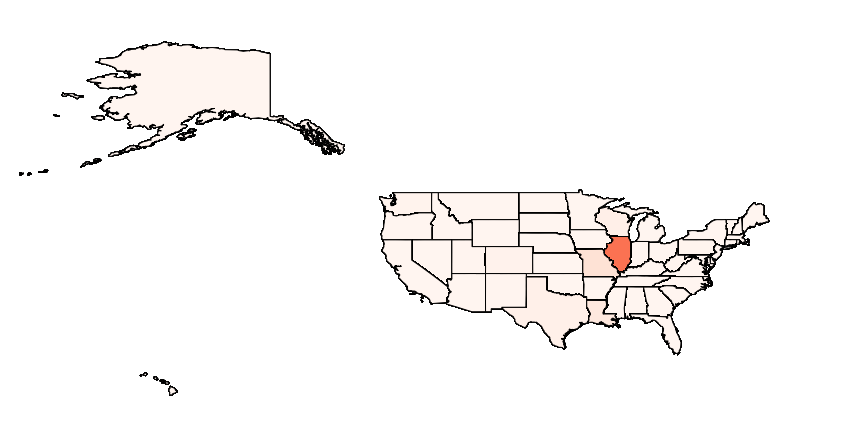

In [80]:
# plot a chloropeth map for cold cases using geoplot
cold = geoplot.choropleth(
    df_ucr_st, hue = df_ucr_st['cold_cases'], scheme = None,
    cmap='Reds', figsize=(15, 15)
)

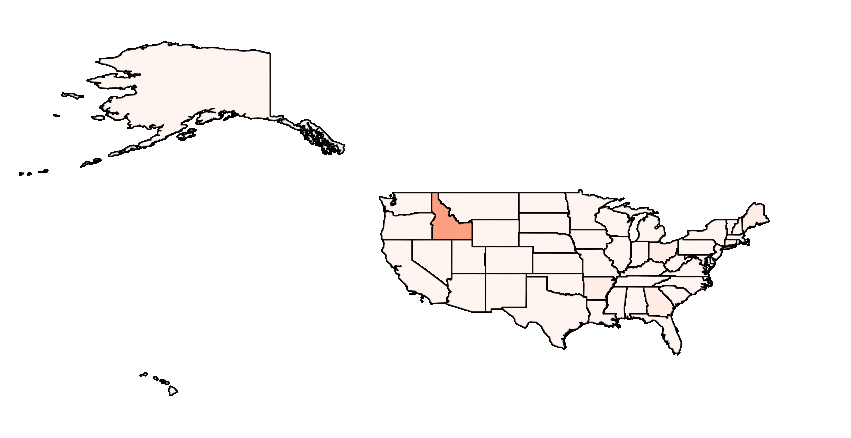

In [72]:
# plot a chloropeth map for additional victims using geoplot
vics = geoplot.choropleth(
df_shr_st, hue = 'add_vic', scheme = None,
cmap='Reds', figsize=(15, 15)
)

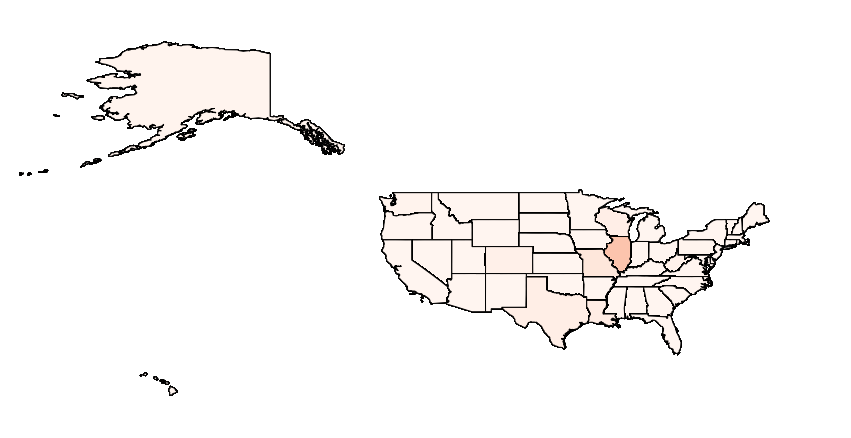

In [86]:
# plot a chloropeth map for homicides using geoplot
vics = geoplot.choropleth(
    df_ucr_st, hue = df_ucr_st['murders'], scheme = None,
    cmap='Reds', figsize=(15, 15)
)

# 06 Results

This analysis has led to answers to 3 research questions.

Where are cold cases most common?
<br>
The first map indicates that Indiana has the most cold cases.

Where are cases with multiple victims likely to occur?
<br>
The second map indicates that Idaho has had the most homicides with muliple victims over the years.

Are homicides more common in certain states?
<br>
The second map indicates that Indiana has had more homicides than other states over the years.

These results were unexpected, and after looking at the data on a pivot table in Excel, I can clearly see that there are more homicides in the more populated states, and not in Indiana. I'm not sure why this is happening. Also, the SHR geo data did not export.